## Иерархический анализ датасета из вина

In [1]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
wine_data = load_wine()
df = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [4]:
# Нет пропущенных данных
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Данные находятся в нужных форматах, но для правильной кластеризации с помощью иерархического кластерного анализа нам
необходимо будет считать евклидовы расстояния между объектами, поэтому дабы это расстояние не определялось лишь порядком величины предиктора необходимо провести стандартизацию данных

In [5]:
from sklearn.preprocessing import StandardScaler

data = df.values  
data_scalar = StandardScaler().fit(data)
data = data_scalar.transform(data)

### Иерархический кластерный анализ

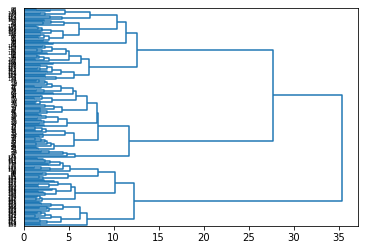

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Посчитаем матрицу расстояний
# Метод Ward определяет как считать расстояния между сформированными кластерами
# metric определеяет как считать расстояние между объектами
link = linkage(data, method='ward', metric='euclidean')

dendr = dendrogram(
    link, 
    color_threshold = -1, 
    orientation = "right",                 
    labels=df.index.tolist()
)

plt.show()

Расстояние между объединяемыми кластерами на 175 шаге объединения: 12.57


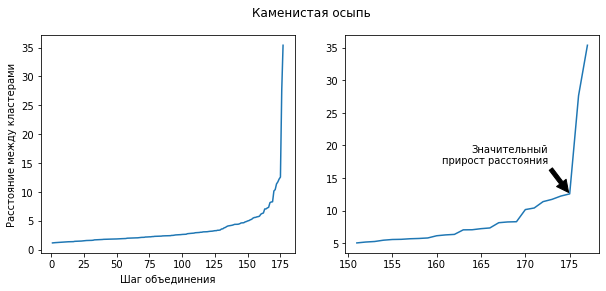

In [7]:
dist = link[:,2] # dist[i,2] определяет расстояние между кластерами (по документации)
x_values = range(1, len(dist)+1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Каменистая осыпь')

ax1.plot(x_values, dist)
ax1.set_ylabel('Расстояние между кластерами')
ax1.set_xlabel('Шаг объединения')

ax2.plot(x_values[150:], dist[150:])

coords = (x_values[174], dist[174])

ax2.annotate(
    'Значительный\nприрост расстояния', xy=coords,  xycoords='data',
    xytext=(0.8, 0.5), textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='right', verticalalignment='top',
    )

print(f'Расстояние между объединяемыми кластерами на 175 шаге объединения: {round(dist[174], 2)}')

Как мы видим, на 167-168 шаге расстояние между объединяемыми кластерами сильно возрастает, поэтому остановим кластеризацию на нем. Теперь снова построим дендрограмму

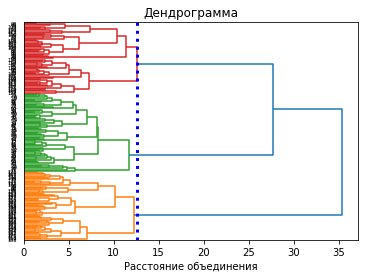

In [8]:
# Снова построим дендрограмму, окрасим кластеры в цвета. Установим color_threshold полученный из графика Каменистая
# осыпь

dendr = dendrogram(
    link, 
    color_threshold=12.57,
    orientation = "right",                 
    labels=df.index.tolist()
)

plt.title('Дендрограмма')
plt.xlabel('Расстояние объединения')
plt.axvline(x=12.57, color='blue', ls=':', lw=3)

В итоге установив threshold в 12.57, мы обрезали дендрограмму до 3 кластеров. Построим теперь кластеризацию по 3 кластерам

In [9]:
# criterion="maxclust" - разбиение по количеству кластеров
# criterion="distance" - разбиение по максимальной дистанции threshold

df['clust_pred'] = fcluster(link, 3, criterion='maxclust') 
df['clust_real'] = wine_data['target']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clust_pred,clust_real
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1,2


Необходимо перекодировать кластеры предсказанные следующим образом {2:0,1:2,3:1}

In [10]:
df['clust_pred'] = df['clust_pred'].map({2:0,1:2,3:1})
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clust_pred,clust_real
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


Проверим теперь качество кластерного анализа и попробуем проинтерпертировать результаты

In [11]:
# Качество анализа
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true=df['clust_real'], y_pred=df['clust_pred'])
print(f"Точность иерархического анализа: {round(accuracy, 3)}")

Точность иерархического анализа: 0.927


In [12]:
# Интерпретация результата
df['clust_pred'].value_counts().to_frame()

,clust_pred
0,64
1,58
2,56


In [13]:
df.groupby('clust_pred').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clust_real
clust_pred,,,,,,,,,,,,,,
0,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875,0.078125
1,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034,1.000000
2,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429,1.857143
